In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("/Users/oscargonzalezsanchez/Documents/ironhack/projects/datasets/2/df_final.csv")
df2 = pd.read_csv("/Users/oscargonzalezsanchez/Documents/ironhack/projects/datasets/2/exp.csv")
df3_1 = pd.read_csv("/Users/oscargonzalezsanchez/Documents/ironhack/projects/datasets/2/data_1.csv")
df3_2 = pd.read_csv("/Users/oscargonzalezsanchez/Documents/ironhack/projects/datasets/2/data_2.csv")

In [3]:
df3 = pd.concat([df3_1,df3_2])

In [4]:
df2.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [5]:
df3.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [6]:
# Merging df1 and df2 on client_id
merged_df1_df2 = pd.merge(df1, df2, on='client_id', how='left')

# Merging the result with df3 on client_id
final_merged_df = pd.merge(merged_df1_df2, df3, on='client_id', how='left')

# Display the merged dataframe
print(final_merged_df.head())

#Columns
final_merged_df.columns

   client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0     836976             6.0              73.0      60.5     U        2.0   
1     836976             6.0              73.0      60.5     U        2.0   
2     836976             6.0              73.0      60.5     U        2.0   
3     836976             6.0              73.0      60.5     U        2.0   
4     836976             6.0              73.0      60.5     U        2.0   

       bal  calls_6_mnth  logons_6_mnth Variation            visitor_id  \
0  45105.3           6.0            9.0      Test  427070339_1413275162   
1  45105.3           6.0            9.0      Test  427070339_1413275162   
2  45105.3           6.0            9.0      Test  427070339_1413275162   
3  45105.3           6.0            9.0      Test  427070339_1413275162   
4  45105.3           6.0            9.0      Test  427070339_1413275162   

                      visit_id process_step            date_time  
0  228976764_468254

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'Variation',
       'visitor_id', 'visit_id', 'process_step', 'date_time'],
      dtype='object')

In [7]:
# Check for duplicate rows based on all columns
duplicates = final_merged_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Check for unique client_ids
unique_clients = final_merged_df['client_id'].nunique()
print(f"Number of unique clients: {unique_clients}")

Number of duplicate rows: 5934
Number of unique clients: 70609


In [8]:
# Check for exact duplicates based on all columns
exact_duplicates = final_merged_df[final_merged_df.duplicated()]

# Display some exact duplicates to understand the issue
print(exact_duplicates.head())

# Check for partial duplicates based on client_id and key columns
partial_duplicates = final_merged_df[final_merged_df.duplicated(subset=['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'])]

# Display some partial duplicates
print(partial_duplicates.head())

     client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
83     2368987             5.0              71.0      54.5     U        2.0   
273    3065089            19.0             228.0      63.0     M        2.0   
428    8387066            27.0             329.0      66.0     M        2.0   
709    7702214             6.0              73.0      32.0     U        2.0   
740    2069824            13.0             167.0      50.5     F        2.0   

           bal  calls_6_mnth  logons_6_mnth Variation             visitor_id  \
83    44408.87           2.0            5.0   Control  962563905_26346206655   
273  439723.43           6.0            9.0      Test  221088883_85206349356   
428  406190.96           6.0            9.0      Test   25210118_96518388064   
709   43988.28           6.0            9.0   Control   67837555_99283824321   
740   52157.46           6.0            9.0   Control  361919188_71063903538   

                         visit_id process_st

In [9]:
# Drop exact duplicates
final_merged_df = final_merged_df.drop_duplicates()

# Confirm the removal
print(f"Number of rows after removing exact duplicates: {final_merged_df.shape[0]}")


Number of rows after removing exact duplicates: 443897


In [10]:
# Remove duplicates keeping the first occurrence
final_merged_df = final_merged_df.drop_duplicates(subset=['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'])

# Confirm the removal
print(f"Number of rows after removing partial duplicates: {final_merged_df.shape[0]}")


Number of rows after removing partial duplicates: 443897


In [11]:
file_path = '/Users/oscargonzalezsanchez/Documents/ironhack/projects/datasets/final_merged_df.csv'
final_merged_df.to_csv(file_path, index=False)

In [12]:
# Check the number of unique clients after cleaning
unique_clients_after_cleaning = final_merged_df['client_id'].nunique()
print(f"Number of unique clients after cleaning: {unique_clients_after_cleaning}")
#Looks good, same unique clients

Number of unique clients after cleaning: 70609


In [13]:
# Group by Variation and summarize
variation_summary = final_merged_df.groupby('Variation').agg({
    'client_id': 'nunique',  # count of unique clients
    'clnt_tenure_yr': 'mean',
    'clnt_age': 'mean',
    'bal': 'mean',
    'calls_6_mnth': 'mean',
    'logons_6_mnth': 'mean'
}).reset_index()

print(variation_summary)

  Variation  client_id  clnt_tenure_yr   clnt_age            bal  \
0   Control      23532       12.167438  48.284478  158880.611361   
1      Test      26968       12.182025  48.722216  162323.086001   

   calls_6_mnth  logons_6_mnth  
0      3.267755       6.303614  
1      3.201986       6.242124  


In [14]:
# Count the occurrences of each process step
process_step_counts = final_merged_df['process_step'].value_counts().reset_index()
process_step_counts.columns = ['process_step', 'count']

print(process_step_counts)

  process_step   count
0        start  141416
1       step_1   95507
2       step_2   79266
3       step_3   67587
4      confirm   60121


In [15]:
# Convert date_time to datetime type
final_merged_df['date_time'] = pd.to_datetime(final_merged_df['date_time'])

# Sort by client_id and date_time
final_merged_df.sort_values(by=['client_id', 'date_time'], inplace=True)

# Calculate the time difference between steps for each client
final_merged_df['time_diff'] = final_merged_df.groupby('client_id')['date_time'].diff()

# Display the time differences
print(final_merged_df[['client_id', 'process_step', 'date_time', 'time_diff']].head())


        client_id process_step           date_time       time_diff
381226        169        start 2017-04-12 20:19:36             NaT
381225        169       step_1 2017-04-12 20:19:45 0 days 00:00:09
381224        169       step_2 2017-04-12 20:20:31 0 days 00:00:46
381223        169       step_3 2017-04-12 20:22:05 0 days 00:01:34
381222        169      confirm 2017-04-12 20:23:09 0 days 00:01:04


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


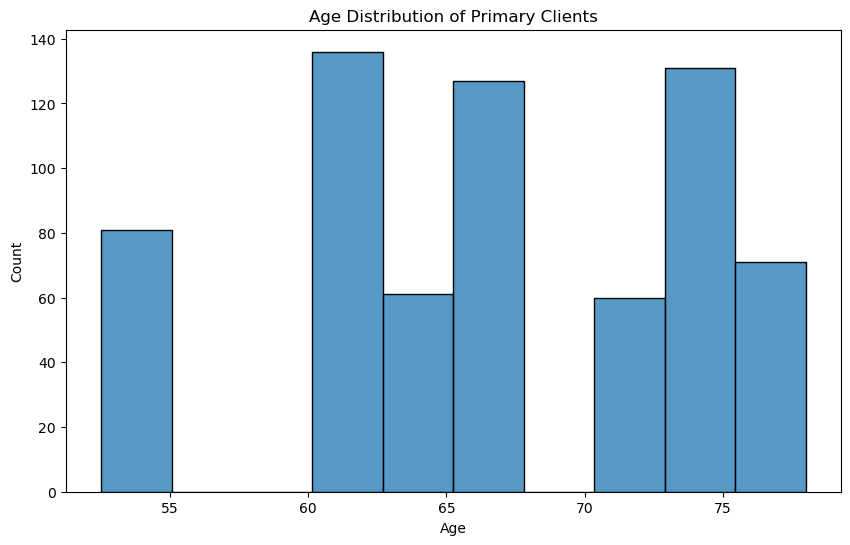

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


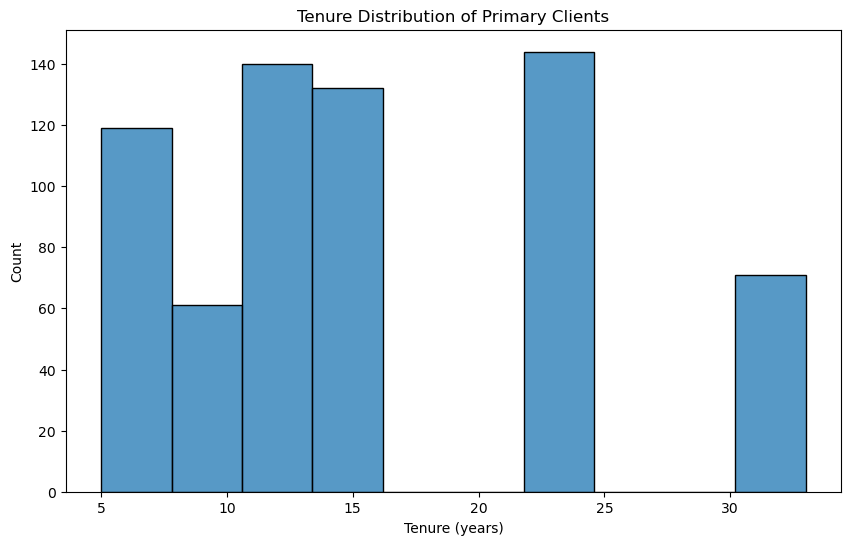

In [16]:
# Frequency Analysis: Count the number of process steps completed by each client
client_process_steps = final_merged_df.groupby('client_id')['process_step'].count().reset_index()
client_process_steps.columns = ['client_id', 'process_steps_count']

# Client Segmentation: Identify primary clients with the highest number of process steps completed
primary_clients = client_process_steps.sort_values(by='process_steps_count', ascending=False).head(10)

# Merge primary clients with original data to analyze their characteristics
primary_clients_data = pd.merge(primary_clients, final_merged_df, on='client_id', how='left')

# Age Distribution of Primary Clients
plt.figure(figsize=(10, 6))
sns.histplot(data=primary_clients_data, x='clnt_age', bins=10)
plt.title('Age Distribution of Primary Clients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Tenure Analysis of Primary Clients
plt.figure(figsize=(10, 6))
sns.histplot(data=primary_clients_data, x='clnt_tenure_yr', bins=10)
plt.title('Tenure Distribution of Primary Clients')
plt.xlabel('Tenure (years)')
plt.ylabel('Count')
plt.show()

In [17]:
#Age dipersion to create